In [1]:
#import libraries 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb

# Cleaning dataset TravelData

In [2]:
#read the data in csv format
df1=pd.read_csv("C:\\Users\\LILLY GRACE\\Downloads\\Data Purchase Journey Travel\\TravelData.csv",na_values=['nan'])

In [3]:
df1.shape

(2456414, 10)

In [4]:
df1.head()

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel
0,9558,1,2016-03-12 22:18:34,5.786,MOBILE,7,0,0,0,0
1,9558,1,2016-03-13 05:25:49,65.725,MOBILE,7,0,0,0,0
2,9558,1,2016-03-13 12:26:21,6.492,MOBILE,7,0,0,0,0
3,9657,2,2015-07-18 13:00:38,57.000,FIXED,4,0,0,0,0
4,1,3,2015-08-07 19:16:59,120.000,FIXED,7,0,0,0,17


In [5]:
df1.isnull().sum()


UserID               0
PurchaseID           0
TIMESPSS             0
Duration        141065
DEVICE_TYPE          0
type_touch           0
purchase_own         0
purchase_any         0
MobilePanel          0
FixedPanel           0
dtype: int64

In [6]:
df1['Duration'].fillna(0,inplace=True)

In [7]:
df1.isnull().sum()

UserID          0
PurchaseID      0
TIMESPSS        0
Duration        0
DEVICE_TYPE     0
type_touch      0
purchase_own    0
purchase_any    0
MobilePanel     0
FixedPanel      0
dtype: int64

In [8]:
df1['type_touch'].value_counts()

1     903588
7     719424
13    213331
4     194343
10    179816
16     57776
2      49145
5      45845
22     34916
14     20929
8       8491
15      7518
3       7443
9       3404
20      2835
21      1929
19      1809
6       1758
18      1580
12       534
Name: type_touch, dtype: int64

In [9]:
df1[(df1['type_touch']>=18) & (df1['type_touch']<23) ].shape

(43069, 10)

In [10]:
df1.shape

(2456414, 10)

In [11]:
len(df1['UserID'].unique())

9678

In [12]:
df1.isnull().sum()/df1.shape[0]

UserID          0.0
PurchaseID      0.0
TIMESPSS        0.0
Duration        0.0
DEVICE_TYPE     0.0
type_touch      0.0
purchase_own    0.0
purchase_any    0.0
MobilePanel     0.0
FixedPanel      0.0
dtype: float64

In [13]:
#null values are 5% of data so its been removed


In [14]:
df1.dtypes

UserID            int64
PurchaseID        int64
TIMESPSS         object
Duration        float64
DEVICE_TYPE      object
type_touch        int64
purchase_own      int64
purchase_any      int64
MobilePanel       int64
FixedPanel        int64
dtype: object

In [15]:
#convert into respective dtypes based on description
df1['TIMESPSS']=pd.to_datetime(df1['TIMESPSS'])

In [16]:
y=['UserID','PurchaseID','type_touch']

In [17]:
for i in y:
    df1[i]=df1[i].astype(str)

In [18]:
df1['purchase_own']=np.where(  ((df1['purchase_own']==0) & (df1['purchase_any']==1) ), 2, df1['purchase_own'])


In [19]:
df1['purchase_own'].value_counts()

0    1607065
2     768246
1      81103
Name: purchase_own, dtype: int64

0 - 0 -  [0]customer own touchpoint purchase has hapended \
1 - 1 -  [2] firm's touchpoint purchase has happened from where customer started journey \
0 - 1 -  [3] competitor firm's website purchase has happened

In [20]:
df1['purchase_status']=df1['purchase_own']+df1['purchase_any']
df1['purchase_status'].value_counts()

0    1607065
3     768246
2      81103
Name: purchase_status, dtype: int64

In [21]:
#combined 3 and 2 becoz 2 category is too less

In [22]:
df1['purchase_status']=np.where(  ((df1['purchase_status']==3) | (df1['purchase_status']==2)) ,1,df1['purchase_status'])

In [23]:
df1['purchase_status'].value_counts()

0    1607065
1     849349
Name: purchase_status, dtype: int64

In [24]:
df1['FixedPanel'].value_counts(normalize=True)

17    0.451880
16    0.105131
0     0.090458
12    0.068587
15    0.043516
14    0.035779
13    0.034609
11    0.031750
9     0.027127
10    0.023371
8     0.019596
7     0.011928
5     0.011241
6     0.011072
4     0.009529
3     0.009293
2     0.007991
1     0.007140
Name: FixedPanel, dtype: float64

In [25]:
df1['MobilePanel'].value_counts(normalize=True)

0     0.650906
17    0.200884
16    0.049194
15    0.011040
11    0.010405
9     0.009545
1     0.009283
12    0.007971
14    0.007941
10    0.007871
4     0.007007
13    0.005064
8     0.004998
6     0.004774
2     0.004264
7     0.003724
3     0.002767
5     0.002363
Name: MobilePanel, dtype: float64

In [26]:
df1['MobilePanel']=np.where(  ((df1['MobilePanel']>=0) & (df1['MobilePanel']<11)) ,18,df1['MobilePanel'])
df1['MobilePanel']=np.where(  ((df1['MobilePanel']>=12) & (df1['MobilePanel']<15)) ,19,df1['MobilePanel'])
df1['MobilePanel']=np.where(  ((df1['MobilePanel']==11) & (df1['MobilePanel']==15) &(df1['MobilePanel']==16) ) ,20,df1['MobilePanel'])

In [27]:
df1['MobilePanel'].value_counts()

18    1737916
17     493454
16     120841
19      51525
15      27119
11      25559
Name: MobilePanel, dtype: int64

In [28]:
df1['FixedPanel']=np.where(  ((df1['FixedPanel']>=1) & (df1['FixedPanel']<5)) ,0,df1['FixedPanel'])
df1['FixedPanel']=np.where(  ((df1['FixedPanel']>=5) & (df1['FixedPanel']<8)) ,1,df1['FixedPanel'])
df1['FixedPanel']=np.where(  ((df1['FixedPanel']>=8) & (df1['FixedPanel']<11)) ,2,df1['FixedPanel'])
df1['FixedPanel']=np.where(  ((df1['FixedPanel']>=11) & (df1['FixedPanel']<17)) ,3,df1['FixedPanel'])

In [29]:
df1['FixedPanel'].value_counts()

17    1110004
3      784511
0      305606
2      172183
1       84110
Name: FixedPanel, dtype: int64

In [30]:
#categories reduced in order to accommodate dummies effectively
df1['FixedPanel']=df1['FixedPanel'].astype(str)
df1['MobilePanel']=df1['MobilePanel'].astype(str)

(array([1737916.,       0.,  493454.,       0.,  120841.,       0.,
          51525.,       0.,   27119.,   25559.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

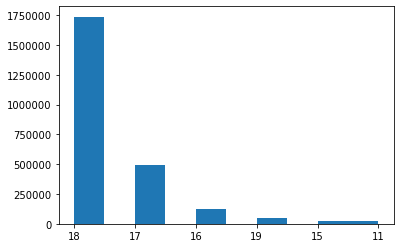

In [31]:
plt.hist(df1['MobilePanel'])

In [32]:
df1.shape

(2456414, 11)

In [33]:
#as its already combined into purchase_status
df1.drop(['purchase_own','purchase_any'],axis=1,inplace=True)

In [34]:
df1.shape

(2456414, 9)

In [35]:
df1.dtypes

UserID                     object
PurchaseID                 object
TIMESPSS           datetime64[ns]
Duration                  float64
DEVICE_TYPE                object
type_touch                 object
MobilePanel                object
FixedPanel                 object
purchase_status             int64
dtype: object

In [36]:
df1.shape #(2456414, 10)

(2456414, 9)

In [37]:
df0=df1.drop_duplicates(subset='PurchaseID',keep='last').reset_index().drop("index",axis=1)
df0.head()

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,MobilePanel,FixedPanel,purchase_status
0,9558,1,2016-03-13 12:26:21,6.492,MOBILE,7,18,0,0
1,9657,2,2015-07-18 13:00:38,57.000,FIXED,4,18,0,0
2,1,3,2015-08-07 19:16:59,120.000,FIXED,7,18,17,0
3,1,4,2015-11-24 22:30:44,216.000,FIXED,1,18,17,0
4,1,5,2016-06-15 15:48:20,155.262,FIXED,7,18,17,0


In [38]:
df0.dtypes

UserID                     object
PurchaseID                 object
TIMESPSS           datetime64[ns]
Duration                  float64
DEVICE_TYPE                object
type_touch                 object
MobilePanel                object
FixedPanel                 object
purchase_status             int64
dtype: object

In [39]:
df0.shape

(29012, 9)

# Cleaning dataset TravelDataDemos

In [40]:
#import dataset regarding customer details
df2=pd.read_csv("C:\\Users\\LILLY GRACE\\Downloads\\Data Purchase Journey Travel\\TravelDataDemos.csv",na_values=['nan'])

In [41]:
df2.shape

(9678, 12)

In [42]:
df2['Age'].fillna(df2['Age'].mean(),inplace=True)

In [43]:
len(df2['UserID'].unique())

9678

In [44]:
df2.head()

,UserID,SPSS_Regio5,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage
0,9558,NaN,NaN,NaN,NaN,51.998762,NaN,NaN,NaN,NaN,NaN,NaN
1,9657,NaN,NaN,NaN,NaN,51.998762,NaN,NaN,NaN,NaN,NaN,NaN
2,1,5.0,6.0,1.0,1.0,59.000000,2.0,2.0,0.0,5.0,2.0,2.0
3,2,3.0,3.0,2.0,2.0,47.000000,2.0,7.0,0.0,2.0,6.0,4.0
4,3,NaN,NaN,NaN,NaN,51.998762,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df2['GenderID'].unique()

array([nan,  1.,  2.])

In [46]:
df2.isnull().sum()/df2.shape[0]

UserID                           0.000000
SPSS_Regio5                      0.165633
RESP_GEM_GROOTTE                 0.165633
BAS_huishoudgrootte              0.165633
GenderID                         0.165633
Age                              0.000000
BAS_werkzaamheid_resp            0.165633
BAS_bruto_jaarinkomen            0.165633
afg_kinderen_huishouden          0.165633
AFG_sk2015                       0.165633
BAS_voltooide_opleiding8_resp    0.209857
SPSS_Lifestage                   0.165633
dtype: float64

In [47]:
df2.dtypes

UserID                             int64
SPSS_Regio5                      float64
RESP_GEM_GROOTTE                 float64
BAS_huishoudgrootte              float64
GenderID                         float64
Age                              float64
BAS_werkzaamheid_resp            float64
BAS_bruto_jaarinkomen            float64
afg_kinderen_huishouden          float64
AFG_sk2015                       float64
BAS_voltooide_opleiding8_resp    float64
SPSS_Lifestage                   float64
dtype: object

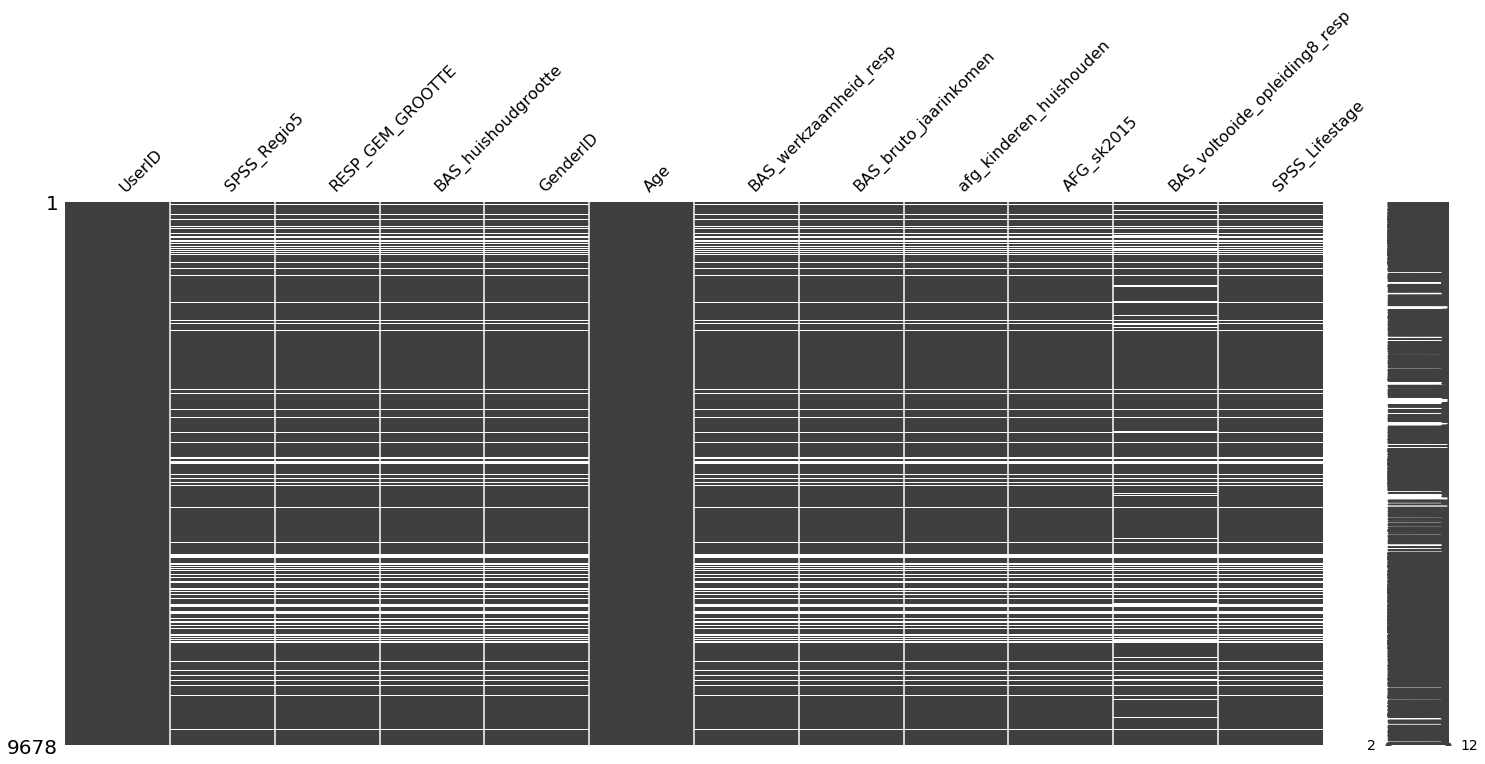

In [48]:
#check for missing values
import missingno as msno  
msno.matrix(df2) 

In [49]:
df2.dtypes

UserID                             int64
SPSS_Regio5                      float64
RESP_GEM_GROOTTE                 float64
BAS_huishoudgrootte              float64
GenderID                         float64
Age                              float64
BAS_werkzaamheid_resp            float64
BAS_bruto_jaarinkomen            float64
afg_kinderen_huishouden          float64
AFG_sk2015                       float64
BAS_voltooide_opleiding8_resp    float64
SPSS_Lifestage                   float64
dtype: object

In [50]:
df2['GenderID']=np.where( df2['GenderID']==1, 0, 1)

In [51]:
x=['UserID','SPSS_Regio5','BAS_werkzaamheid_resp','BAS_voltooide_opleiding8_resp','SPSS_Lifestage']

In [52]:
for i in x:
    df2[i]=df2[i].astype(str)

In [53]:
df2.dtypes

UserID                            object
SPSS_Regio5                       object
RESP_GEM_GROOTTE                 float64
BAS_huishoudgrootte              float64
GenderID                           int32
Age                              float64
BAS_werkzaamheid_resp             object
BAS_bruto_jaarinkomen            float64
afg_kinderen_huishouden          float64
AFG_sk2015                       float64
BAS_voltooide_opleiding8_resp     object
SPSS_Lifestage                    object
dtype: object

In [54]:
for c in list(df2.select_dtypes(include=['O']).columns):
    df2[c].fillna(df2[c].value_counts().index[0],inplace=True)  

In [55]:
for c in list(df2.select_dtypes(exclude=['O']).columns):
    df2[c].fillna(df2[c].mean(),inplace=True)

In [56]:
df2.isnull().sum()/df2.shape[0]

UserID                           0.0
SPSS_Regio5                      0.0
RESP_GEM_GROOTTE                 0.0
BAS_huishoudgrootte              0.0
GenderID                         0.0
Age                              0.0
BAS_werkzaamheid_resp            0.0
BAS_bruto_jaarinkomen            0.0
afg_kinderen_huishouden          0.0
AFG_sk2015                       0.0
BAS_voltooide_opleiding8_resp    0.0
SPSS_Lifestage                   0.0
dtype: float64

In [57]:
df2.shape

(9678, 12)

# Final Dataset

In [58]:
#combining the two dataset set for better understanding
df3=pd.merge(df0,df2,on='UserID',how='left')

In [59]:
df3.head()

,UserID,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,MobilePanel,FixedPanel,purchase_status,SPSS_Regio5,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,BAS_voltooide_opleiding8_resp,SPSS_Lifestage
0,9558,1,2016-03-13 12:26:21,6.492,MOBILE,7,18,0,0,nan,4.893498,2.514675,1,51.998762,nan,4.49226,0.482229,2.853003,nan,nan
1,9657,2,2015-07-18 13:00:38,57.000,FIXED,4,18,0,0,nan,4.893498,2.514675,1,51.998762,nan,4.49226,0.482229,2.853003,nan,nan
2,1,3,2015-08-07 19:16:59,120.000,FIXED,7,18,17,0,5.0,6.000000,1.000000,0,59.000000,2.0,2.00000,0.000000,5.000000,2.0,2.0
3,1,4,2015-11-24 22:30:44,216.000,FIXED,1,18,17,0,5.0,6.000000,1.000000,0,59.000000,2.0,2.00000,0.000000,5.000000,2.0,2.0
4,1,5,2016-06-15 15:48:20,155.262,FIXED,7,18,17,0,5.0,6.000000,1.000000,0,59.000000,2.0,2.00000,0.000000,5.000000,2.0,2.0


In [60]:
df3.shape

(29012, 20)

In [61]:
df3.isnull().sum()

UserID                           0
PurchaseID                       0
TIMESPSS                         0
Duration                         0
DEVICE_TYPE                      0
type_touch                       0
MobilePanel                      0
FixedPanel                       0
purchase_status                  0
SPSS_Regio5                      0
RESP_GEM_GROOTTE                 0
BAS_huishoudgrootte              0
GenderID                         0
Age                              0
BAS_werkzaamheid_resp            0
BAS_bruto_jaarinkomen            0
afg_kinderen_huishouden          0
AFG_sk2015                       0
BAS_voltooide_opleiding8_resp    0
SPSS_Lifestage                   0
dtype: int64

In [62]:
df3.dtypes

UserID                                   object
PurchaseID                               object
TIMESPSS                         datetime64[ns]
Duration                                float64
DEVICE_TYPE                              object
type_touch                               object
MobilePanel                              object
FixedPanel                               object
purchase_status                           int64
SPSS_Regio5                              object
RESP_GEM_GROOTTE                        float64
BAS_huishoudgrootte                     float64
GenderID                                  int32
Age                                     float64
BAS_werkzaamheid_resp                    object
BAS_bruto_jaarinkomen                   float64
afg_kinderen_huishouden                 float64
AFG_sk2015                              float64
BAS_voltooide_opleiding8_resp            object
SPSS_Lifestage                           object
dtype: object

In [63]:
df3.isnull().sum()

UserID                           0
PurchaseID                       0
TIMESPSS                         0
Duration                         0
DEVICE_TYPE                      0
type_touch                       0
MobilePanel                      0
FixedPanel                       0
purchase_status                  0
SPSS_Regio5                      0
RESP_GEM_GROOTTE                 0
BAS_huishoudgrootte              0
GenderID                         0
Age                              0
BAS_werkzaamheid_resp            0
BAS_bruto_jaarinkomen            0
afg_kinderen_huishouden          0
AFG_sk2015                       0
BAS_voltooide_opleiding8_resp    0
SPSS_Lifestage                   0
dtype: int64

In [64]:
#apply models in this dataset df3
df3.shape

(29012, 20)

In [65]:
df3['month']=pd.to_datetime(df3['TIMESPSS'],format="%Y%m%d").dt.month
df3['year']=pd.to_datetime(df3['TIMESPSS'],format="%Y%m%d").dt.year
df3['year_month']=df3['year'].astype(str)+"_"+df3['month'].astype(str)

In [66]:
df3['BAS_voltooide_opleiding8_resp']=np.where(df3['BAS_voltooide_opleiding8_resp']=='nan','97',df3['BAS_voltooide_opleiding8_resp'])

In [67]:
df4=df3.drop(['UserID','PurchaseID','TIMESPSS','month','year'],axis=1)

In [68]:
df4.dtypes

Duration                         float64
DEVICE_TYPE                       object
type_touch                        object
MobilePanel                       object
FixedPanel                        object
purchase_status                    int64
SPSS_Regio5                       object
RESP_GEM_GROOTTE                 float64
BAS_huishoudgrootte              float64
GenderID                           int32
Age                              float64
BAS_werkzaamheid_resp             object
BAS_bruto_jaarinkomen            float64
afg_kinderen_huishouden          float64
AFG_sk2015                       float64
BAS_voltooide_opleiding8_resp     object
SPSS_Lifestage                    object
year_month                        object
dtype: object

In [69]:
df4.shape

(29012, 18)

In [70]:
df4.drop(['afg_kinderen_huishouden','RESP_GEM_GROOTTE','Age'],axis=1,inplace=True)

In [71]:
df4.drop(['type_touch','BAS_voltooide_opleiding8_resp','year_month','DEVICE_TYPE'],axis=1,inplace=True)

In [72]:
df4.shape

(29012, 11)

In [73]:
df4.dtypes

Duration                 float64
MobilePanel               object
FixedPanel                object
purchase_status            int64
SPSS_Regio5               object
BAS_huishoudgrootte      float64
GenderID                   int32
BAS_werkzaamheid_resp     object
BAS_bruto_jaarinkomen    float64
AFG_sk2015               float64
SPSS_Lifestage            object
dtype: object

# Some Insights through the given data

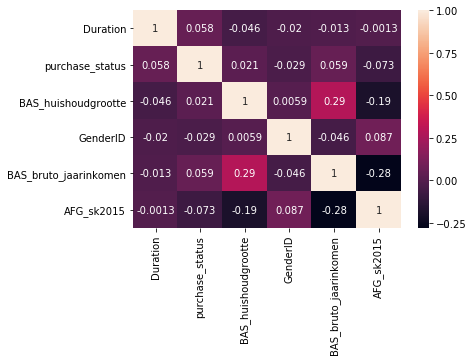

In [74]:
sb.heatmap(df4.corr(),annot=True)

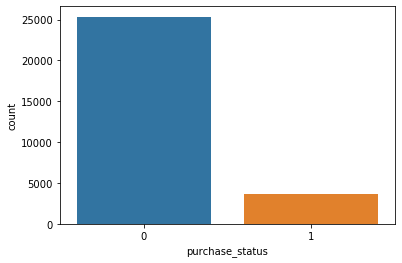

In [75]:
sb.countplot(df4['purchase_status'])  #0=CIC and 1=FIC

In [76]:
#number of users in the data
len(df3['UserID'].unique())

9111

In [77]:
#number of purchases that have occurred
len(df3['PurchaseID'].unique())

29012

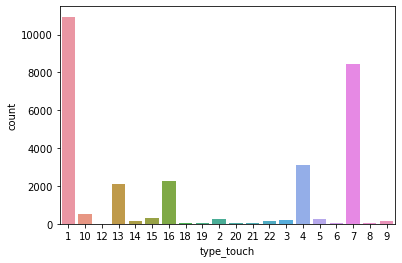

In [78]:
sb.countplot(df3['type_touch'])

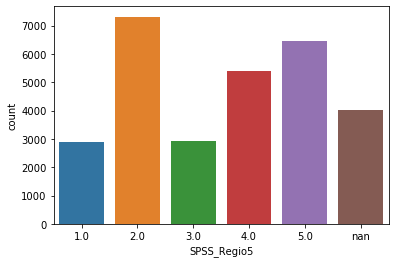

In [79]:
sb.countplot(df4['SPSS_Regio5'])

In [80]:
#% of people using device_type
df3.groupby('DEVICE_TYPE').agg({'DEVICE_TYPE':'size'})/df3.shape[0]

,DEVICE_TYPE
DEVICE_TYPE,
FIXED,0.804288
MOBILE,0.195712


In [81]:
# customer behaviour in online space
# whether it is Customer-initiated Touchpoint or Company-initiated touchpoint).
# Channels such as display, retargeting, affiliate, and e-mail advertising have been classified as contacts initiated 
#by the firm
#2015-2016 

In [82]:
df3.to_csv(r'C:\\Users\\LILLY GRACE\\Downloads\\Data Purchase Journey Travel\\df3.csv')

In [83]:
df4.dtypes

Duration                 float64
MobilePanel               object
FixedPanel                object
purchase_status            int64
SPSS_Regio5               object
BAS_huishoudgrootte      float64
GenderID                   int32
BAS_werkzaamheid_resp     object
BAS_bruto_jaarinkomen    float64
AFG_sk2015               float64
SPSS_Lifestage            object
dtype: object

In [84]:
df3['type_touch']=df3['type_touch'].astype(int)

In [85]:
df3['type_touch'].value_counts()

1     10938
7      8445
4      3089
16     2246
13     2085
10      506
15      322
2       275
5       241
3       181
14      161
22      149
9       132
21       60
8        52
20       43
19       28
18       28
6        26
12        5
Name: type_touch, dtype: int64

In [86]:
df3.shape

(29012, 23)

In [87]:
df4.dtypes

Duration                 float64
MobilePanel               object
FixedPanel                object
purchase_status            int64
SPSS_Regio5               object
BAS_huishoudgrootte      float64
GenderID                   int32
BAS_werkzaamheid_resp     object
BAS_bruto_jaarinkomen    float64
AFG_sk2015               float64
SPSS_Lifestage            object
dtype: object

In [88]:
df5=df4.drop(['SPSS_Regio5','BAS_werkzaamheid_resp','SPSS_Lifestage'],axis=1)

In [90]:
df5['MobilePanel']=df5['MobilePanel'].astype(int)
df5['FixedPanel']=df5['FixedPanel'].astype(int)

In [91]:
df5.dtypes

Duration                 float64
MobilePanel                int32
FixedPanel                 int32
purchase_status            int64
BAS_huishoudgrootte      float64
GenderID                   int32
BAS_bruto_jaarinkomen    float64
AFG_sk2015               float64
dtype: object

In [92]:
import sklearn.preprocessing as preprocessing
dat_scaled=preprocessing.scale(df5,axis=0)

In [93]:
import sklearn.cluster as cluster

In [94]:
from scipy.spatial.distance import cdist
K=range(1,20)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dat_scaled)
    wss.append(sum(np.min(cdist(dat_scaled, kmeans.cluster_centers_, 'euclidean'),axis=1)))

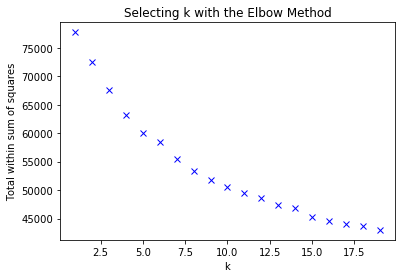

In [96]:
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('Total within sum of squares')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [98]:
import sklearn.metrics as metrics

In [125]:
for i in range(5,15):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dat_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(dat_scaled,labels,metric="euclidean",
                                 random_state=200)))
   

Silhoutte score for k= 5 is 0.1824788389769526
Silhoutte score for k= 6 is 0.18998032720760583
Silhoutte score for k= 7 is 0.2036002111303463
Silhoutte score for k= 8 is 0.2027717431580955
Silhoutte score for k= 9 is 0.2050578711275978
Silhoutte score for k= 10 is 0.21160318530696925
Silhoutte score for k= 11 is 0.2202003032588912
Silhoutte score for k= 12 is 0.22157111966755594
Silhoutte score for k= 13 is 0.21407167469229182
Silhoutte score for k= 14 is 0.21712021887889918


In [117]:
kmeans=cluster.KMeans(n_clusters=5,init="k-means++",random_state=200)
kmeans=kmeans.fit(dat_scaled)  #it doesnt change convergence
kmeans

KMeans(n_clusters=5, random_state=200)

In [118]:
lab=kmeans.labels_ #tis is the attribute
lab=list(lab)
lab

[1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 4,
 4,
 0,
 2,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 4,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 1,
 1,
 3,
 3,
 2,
 3,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 3,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 4,
 4,
 4,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 1,
 3,
 3,
 1,
 4,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 4,
 4,
 2,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 1,
 1,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 4,
 1,
 3,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 4,
 1,
 1,
 3,
 3,
 2,
 4,
 2,
 4,
 1,


In [119]:
df5['labels']=lab

In [120]:
df5.groupby('labels').agg({'labels':"size"})


,labels
labels,
0,6062
1,10451
2,5808
3,3646
4,3045


In [124]:
df5[df5['labels']==0].describe()

,Duration,MobilePanel,FixedPanel,purchase_status,BAS_huishoudgrootte,GenderID,BAS_bruto_jaarinkomen,AFG_sk2015,labels
count,6062.000000,6062.000000,6062.000000,6062.0,6062.000000,6062.000000,6062.000000,6062.000000,6062.0
mean,57.055242,17.788354,9.028538,0.0,1.612339,0.704883,2.338337,3.986803,0.0
std,76.418672,0.661908,7.525199,0.0,0.682469,0.456133,0.970534,1.004604,0.0
min,0.000000,11.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.000000,0.0
25%,6.000000,18.000000,3.000000,0.0,1.000000,0.000000,2.000000,3.000000,0.0
50%,24.023500,18.000000,3.000000,0.0,2.000000,1.000000,2.000000,4.000000,0.0
75%,81.476500,18.000000,17.000000,0.0,2.000000,1.000000,3.000000,5.000000,0.0
max,507.879000,19.000000,17.000000,0.0,5.000000,1.000000,5.000000,5.000000,0.0


In [122]:
df5[df5['labels']==1].describe()

,Duration,MobilePanel,FixedPanel,purchase_status,BAS_huishoudgrootte,GenderID,BAS_bruto_jaarinkomen,AFG_sk2015,labels
count,10451.000000,10451.000000,10451.000000,10451.0,10451.000000,10451.0,10451.000000,10451.000000,10451.0
mean,50.529588,17.644627,7.077600,0.0,2.760962,1.0,5.240198,2.533832,1.0
std,68.583592,0.937274,7.411656,0.0,1.076865,0.0,1.695855,1.006904,0.0
min,0.000000,11.000000,0.000000,0.0,1.000000,1.0,1.000000,1.000000,1.0
25%,4.580000,18.000000,1.000000,0.0,2.000000,1.0,4.492260,2.000000,1.0
50%,20.553000,18.000000,3.000000,0.0,2.514675,1.0,4.492260,2.853003,1.0
75%,71.076500,18.000000,17.000000,0.0,3.000000,1.0,6.000000,3.000000,1.0
max,442.139000,19.000000,17.000000,0.0,11.000000,1.0,8.000000,5.000000,1.0


In [123]:
df5[df5['labels']==2].describe()

,Duration,MobilePanel,FixedPanel,purchase_status,BAS_huishoudgrootte,GenderID,BAS_bruto_jaarinkomen,AFG_sk2015,labels
count,5808.000000,5808.000000,5808.000000,5808.0,5808.000000,5808.0,5808.000000,5808.000000,5808.0
mean,53.885812,17.543561,6.793216,0.0,2.645833,0.0,5.202652,2.200241,2.0
std,75.908454,1.076622,7.313783,0.0,1.262136,0.0,1.611291,1.074632,0.0
min,0.000000,11.000000,0.000000,0.0,1.000000,0.0,1.000000,1.000000,2.0
25%,4.168750,17.000000,1.000000,0.0,2.000000,0.0,4.000000,1.000000,2.0
50%,19.690000,18.000000,3.000000,0.0,2.000000,0.0,5.000000,2.000000,2.0
75%,78.000000,18.000000,17.000000,0.0,4.000000,0.0,6.000000,3.000000,2.0
max,495.333000,19.000000,17.000000,0.0,10.000000,0.0,8.000000,5.000000,2.0


In [110]:
df5[df5['labels']==4].describe()

,Duration,MobilePanel,FixedPanel,purchase_status,BAS_huishoudgrootte,GenderID,BAS_bruto_jaarinkomen,AFG_sk2015,labels
count,3127.000000,3127.000000,3127.000000,3127.0,3127.000000,3127.000000,3127.000000,3127.000000,3127.0
mean,54.494098,17.812600,8.276623,0.0,1.579149,0.993924,2.117685,4.296130,4.0
std,70.604645,0.542554,7.369025,0.0,0.673547,0.077725,0.895837,0.768831,0.0
min,0.000000,15.000000,0.000000,0.0,1.000000,0.000000,1.000000,2.000000,4.0
25%,6.000000,18.000000,3.000000,0.0,1.000000,1.000000,2.000000,4.000000,4.0
50%,23.690000,18.000000,3.000000,0.0,1.000000,1.000000,2.000000,4.000000,4.0
75%,79.000000,18.000000,17.000000,0.0,2.000000,1.000000,3.000000,5.000000,4.0
max,398.136000,19.000000,17.000000,0.0,5.000000,1.000000,5.000000,5.000000,4.0
